In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt

# Introduction

The Dataset is obtained from [openAfrica](www.africaopendata.org) about the Air Quality in Accra. The Data set contains PM (particulate matter), temperature, and humidity readings taken with low-cost sensors. The data gathered is from November 2019 to March 2021.

## Data Gathering

In [15]:
#creating a dictionary of the monthly dataset archive urls
datasets_url = {
    "nov_2019":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/04a16ec8-299b-411b-8cdb-392cf4e614f3/download/november_2019_sensor_data_archive.csv",
    "dec_2019":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/621ade0a-529b-4ddb-ab30-ee6c7dbacbac/download/december_2019_sensor_data_archive.csv",
    "jan_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/642bd73a-afb5-4798-915b-d4962d15c47b/download/january_2020_sensor_data_archive.csv",
    "feb_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/0c689ca3-5c7a-42a2-bf68-31e5652883b3/download/february_2020_sensor_data_archive.csv",
    "mar_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/89d08468-96ca-4b2e-afe1-e7f5a6c9ef80/download/march_2020_sensor_data_archive.csv",
    "apr_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/b0a8de4c-1ceb-4819-82c9-858172ecbae8/download/april_2020_sensor_data_archive.csv",
    "may_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/c45e7671-0b69-483a-9cae-a9b0fc1bbd5b/download/may_2020_sensor_data_archive.csv",
    "jun_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/313e0c84-eaaf-4361-adb0-77f8eebdc396/download/june_2020_sensor_data_archive.csv",
    "jul_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/7e99ceb0-749c-4373-8716-6cbee92cc3cf/download/july_2020_sensor_data_archive.csv",
    "aug_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/f5851f48-b651-4b6e-b7ee-25243b71a674/download/august_2020_sensor_data_archive.csv",
    "sep_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/dc25e16a-864d-4c10-86ea-79203c68ddb5/download/september_2020_sensor_data_archive.csv",
    "oct_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/a16bf679-f5f3-49da-8941-db77b55b4290/download/october_2020_sensor_data_archive.csv",
    "nov_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/8132c35c-4d74-44fe-bbee-0e66ec5e0305/download/november_2020_sensor_data_archive.csv",
    "dec_2020":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/aba34b9b-1744-4f23-ae20-d2d0d077bfa8/download/december_2020_sensor_data_archive.csv",
    "jan_2021":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/415feafc-eafc-4872-86f6-84af1af32f25/download/january_2021_sensor_data_archive.csv",
    "feb_2021":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/153c89ed-9ce6-46b9-87d3-f429bc54cd9d/download/february_2021_sensor_data_archive.csv",
    "mar_2021":"https://staging.openafrica.net/dataset/6fc69703-7da3-4c8e-b864-65e0c5f1e4d5/resource/f075000a-8090-445f-be1f-4a8dac2547a8/download/march_2021_sensor_data_archive.csv"
}

In [19]:
#Read datasets directly from the URL and storing them in a dicctionary
df_dict = {}
for month in datasets_url:
    df_dict[month] = pd.read_csv(datasets_url[month], sep=";")
    print(f"{month} added.")

nov_2019 added.
dec_2019 added.
jan_2020 added.
feb_2020 added.
mar_2020 added.
apr_2020 added.
may_2020 added.
jun_2020 added.
jul_2020 added.
aug_2020 added.
sep_2020 added.
oct_2020 added.
nov_2020 added.
dec_2020 added.
jan_2021 added.
feb_2021 added.
mar_2021 added.


## Assessig Data

In [23]:
for month in df_dict:
    print(month + "\n")
    print(df_dict[month].info())
    print("\n")

nov_2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_id    78 non-null     int64  
 1   sensor_type  78 non-null     object 
 2   location     78 non-null     int64  
 3   lat          78 non-null     float64
 4   lon          78 non-null     float64
 5   timestamp    78 non-null     object 
 6   value_type   78 non-null     object 
 7   value        78 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.0+ KB
None


dec_2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_id    313 non-null    int64  
 1   sensor_type  313 non-null    object 
 2   location     313 non-null    int64  
 3   lat          313 non-null    float64
 4   lon          313 non-null   

In [31]:
#Converting timestamp into localize datetime datatype and as index
for month in df_dict:
    df_dict[month]["timestamp"] = pd.to_datetime(df_dict[month]["timestamp"], infer_datetime_format=True)
    df_dict[month].set_index("timestamp", inplace = True)
    df_dict[month].index = df_dict[month].index.tz_convert("Africa/Accra")

In [37]:
#check air quality readings type
for month in df_dict:
    print(month + "\n")
    print(df_dict[month]["value_type"].unique())
    print("\n")

nov_2019

['P2']


dec_2019

['P2']


jan_2020

['P2']


feb_2020

['P2']


mar_2020

['P2']


apr_2020

['P2']


may_2020

['P2']


jun_2020

['P2']


jul_2020

['P2']


aug_2020

['P2']


sep_2020

['P2']


oct_2020

['P2']


nov_2020

['P2']


dec_2020

['P2']


jan_2021

['P2']


feb_2021

['P2']


mar_2021

['P2']




In [140]:
#concatenating all dataframes
df = pd.concat(list(df_dict.values()))

In [60]:
df.head()

,sensor_id,sensor_type,location,lat,lon,value_type,value
timestamp,,,,,,,
2019-11-27 10:00:00+00:00,1495,BAM 1020,3414,5.58,-0.17,P2,0.0
2019-11-27 11:00:00+00:00,1495,BAM 1020,3414,5.58,-0.17,P2,0.0
2019-11-27 12:00:00+00:00,1495,BAM 1020,3414,5.58,-0.17,P2,0.0
2019-11-27 13:00:00+00:00,1495,BAM 1020,3414,5.58,-0.17,P2,0.0
2019-11-27 14:00:00+00:00,1495,BAM 1020,3414,5.58,-0.17,P2,0.0


In [61]:
df.shape

(23528, 7)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23528 entries, 2019-11-27 10:00:00+00:00 to 2021-03-23 10:00:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_id    23528 non-null  int64  
 1   sensor_type  23528 non-null  object 
 2   location     23528 non-null  int64  
 3   lat          23528 non-null  float64
 4   lon          23528 non-null  float64
 5   value_type   23528 non-null  object 
 6   value        23528 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ MB


> Dropping the sensor_id, sensor_type and location column because they are not relevant in this analysis

In [63]:
columns_to_keep = ["lat", "lon","value_type","value"]
df = df[columns_to_keep]

In [52]:
df.head()

,lat,lon,value_type,value
timestamp,,,,
2019-11-27 10:00:00+00:00,5.58,-0.17,P2,0.0
2019-11-27 11:00:00+00:00,5.58,-0.17,P2,0.0
2019-11-27 12:00:00+00:00,5.58,-0.17,P2,0.0
2019-11-27 13:00:00+00:00,5.58,-0.17,P2,0.0
2019-11-27 14:00:00+00:00,5.58,-0.17,P2,0.0


In [64]:
#Dropping value_type column and changing 'value' column name to P2
df.rename(columns= {
    "value":"P2"
}, inplace = True)

df.drop(columns =["value_type"], axis =1, inplace = True)

In [101]:
df.head()

,lat,lon,P2
timestamp,,,
2019-11-27 10:00:00+00:00,5.58,-0.17,0.0
2019-11-27 11:00:00+00:00,5.58,-0.17,0.0
2019-11-27 12:00:00+00:00,5.58,-0.17,0.0
2019-11-27 13:00:00+00:00,5.58,-0.17,0.0
2019-11-27 14:00:00+00:00,5.58,-0.17,0.0


In [102]:
#resmapling data into mean of hour and forward fill nan rows
df = df.resample("1H").mean().fillna(method = "ffill")

In [ ]:
#save the wrangled data to csv
df.to_csv("accra_air_quality.csv")

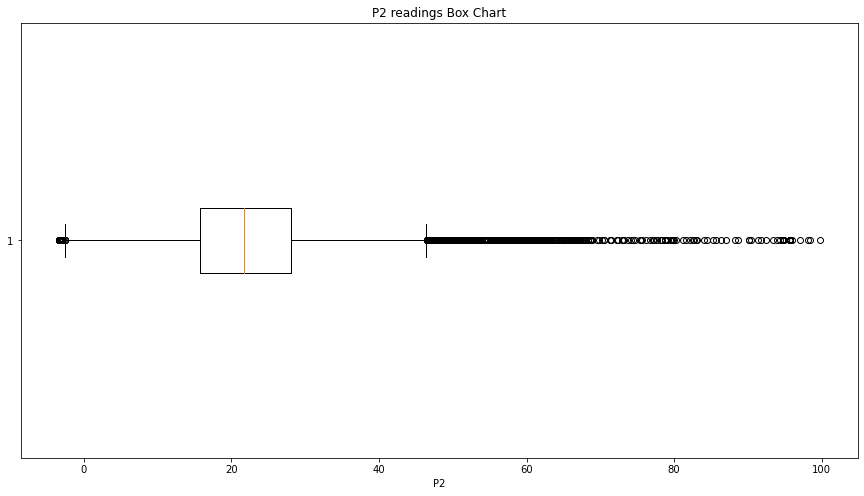

In [103]:
#plotting boxplots to chec for outliers
fig, ax = plt.subplots(figsize = [15,8])
ax.boxplot(df.P2, vert = False);
ax.set_title("P2 readings Box Chart")
plt.xlabel("P2");

Text(0.5, 0, 'P2')

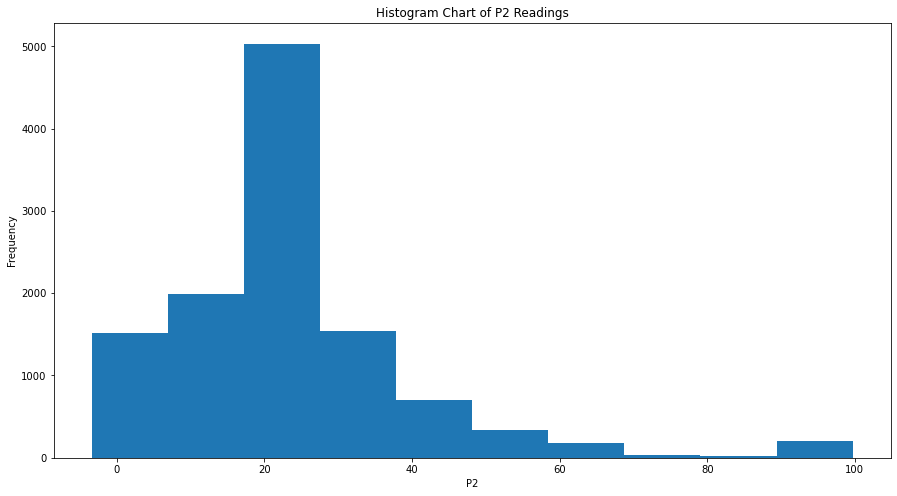

In [104]:
fig, ax = plt.subplots(figsize = [15,8])
ax.hist(df.P2);
ax.set_title("Histogram Chart of P2 Readings")
plt.ylabel("Frequency")
plt.xlabel("P2")

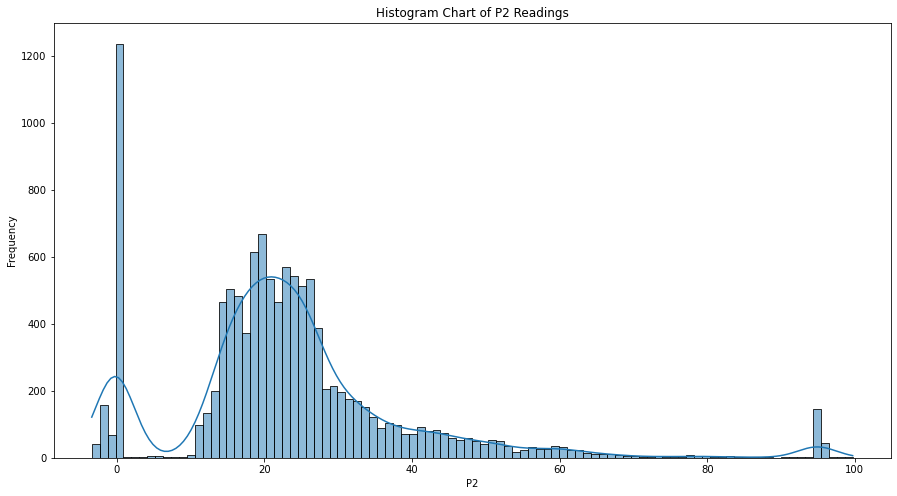

In [105]:
fig, ax = plt.subplots(figsize = [15,8])
sb.histplot(df.P2,ax=ax,kde=True);
ax.set_title("Histogram Chart of P2 Readings")
plt.ylabel("Frequency")
plt.xlabel("P2");

In [106]:
df.shape

(11569, 3)

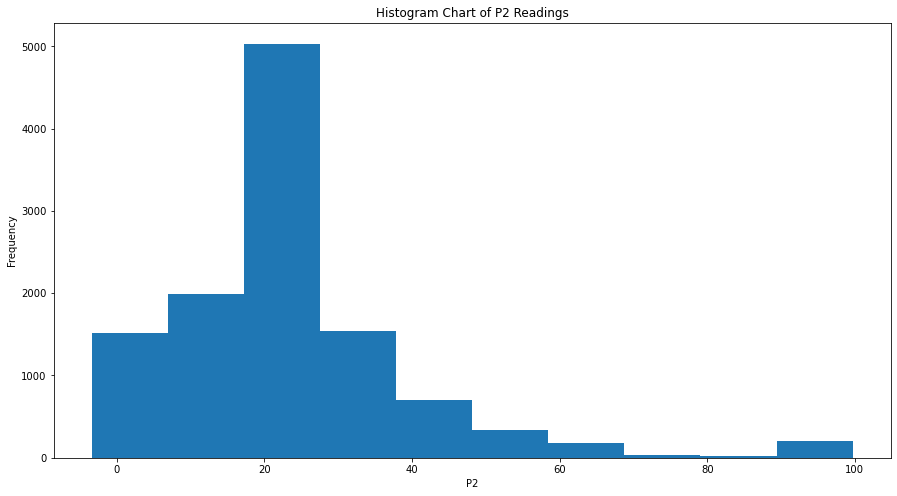

In [108]:
fig, ax = plt.subplots(figsize = [15,8])
ax.hist(df.P2);
ax.set_title("Histogram Chart of P2 Readings")
plt.ylabel("Frequency")
plt.xlabel("P2");

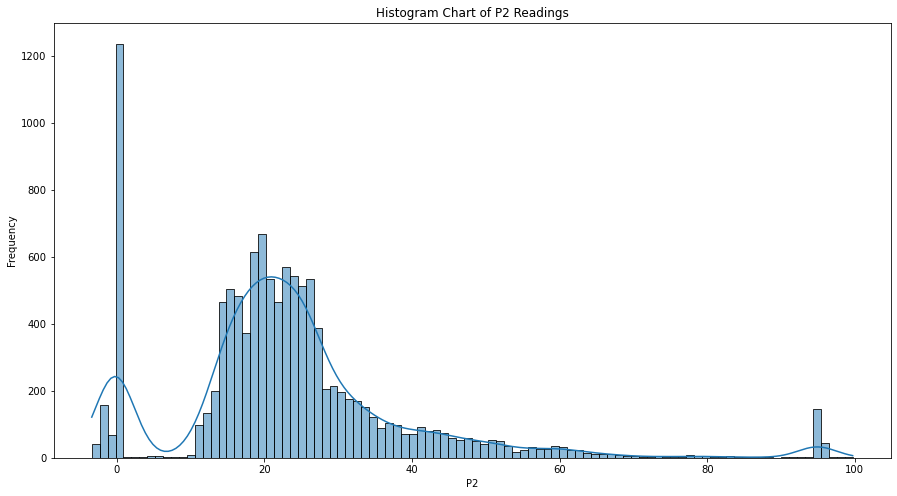

In [109]:
fig, ax = plt.subplots(figsize = [15,8])
sb.histplot(df.P2,ax=ax,kde=True);
ax.set_title("Histogram Chart of P2 Readings")
plt.ylabel("Frequency")
plt.xlabel("P2");

According to [epa.gov](), neagtive PM readings are due to reasons such as instrument malfunction, caliration errors etc, and also, the zero PM readings are nearly not possible, thus it will be reasonable to drop P2 readings that are zero and below.

In [121]:
df = df[df["P2"] > 0]
df.shape

(10067, 3)

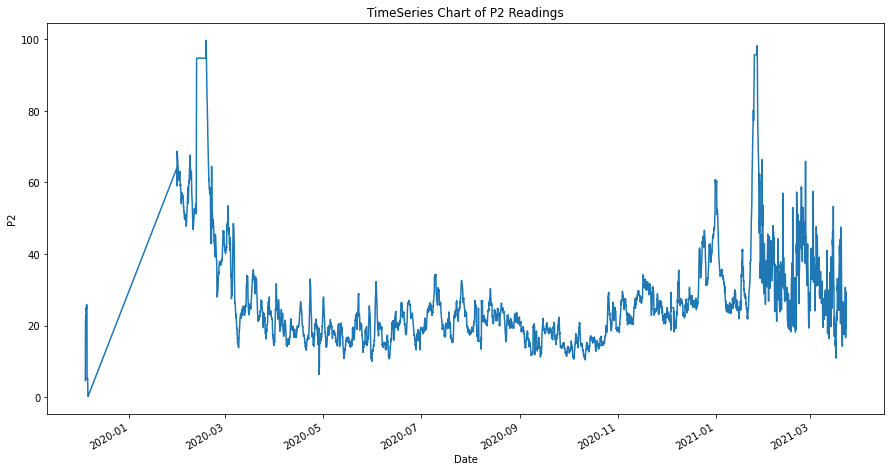

In [122]:
#plotting a timeseries graph of the P2 readings
fig, ax = plt.subplots(figsize = [15,8])
df["P2"].plot(ax =ax)
ax.set_title("TimeSeries Chart of P2 Readings")
plt.ylabel("P2")
plt.xlabel("Date");

To get a clear insight of the P2 readings, the dataframe will be rolled into weekly rolling averages i.e. 168 window size

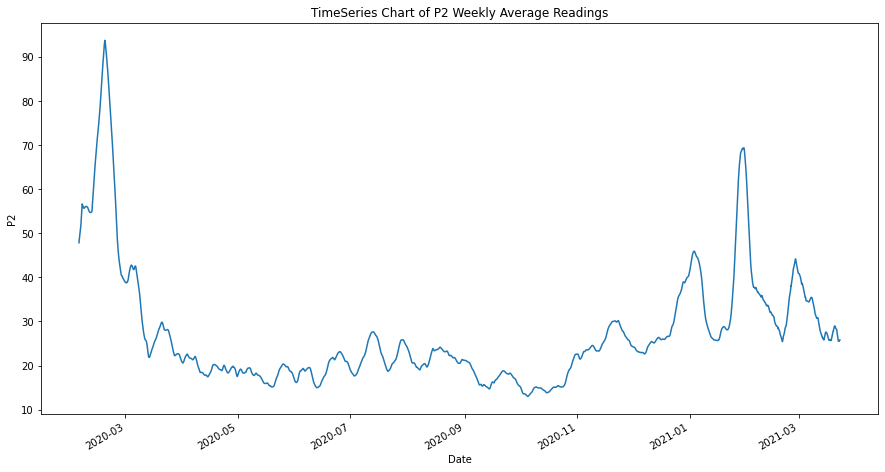

In [123]:
#rolling the data into 168 window size averages
#plotting a timeseries graph of the P2 readings
fig, ax = plt.subplots(figsize = [15,8])
df["P2"].rolling(168).mean().plot(ax =ax)
ax.set_title("TimeSeries Chart of P2 Weekly Average Readings")
plt.ylabel("P2")
plt.xlabel("Date");

### Analysis Questions

- Which periods were there spikes in the P2 readings?
- On a timely Average, were there periods where P2 readings were relatively stable?

##### Which periods were there spikes in the P2 readings?
> Using the mean P2 reading as a baseline

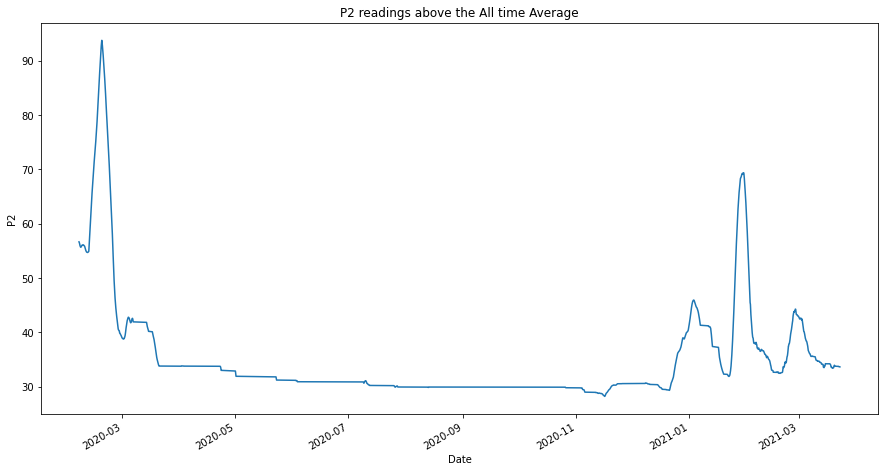

In [137]:
#calculate the mean
mean_p2 = df["P2"].mean()

# query for time periods were P2 readings were off the mean
fig, ax = plt.subplots(figsize = (15,8))
df[df["P2"] > mean_p2]["P2"].rolling(168).mean().plot(ax =ax)
plt.title("P2 readings above the All time Average")
plt.ylabel("P2")
plt.xlabel("Date");

The timeseries chart shows two major peaks of P2 readings: one in March 2020 and another from January 2021 onwards. These peaks correspond to periods of low air pollution due to the COVID pandemic and the subsequent lockdowns in major Ghanaian cities such as Accra. During these lockdowns, industrial and commercial activities that contribute to air pollution were reduced or halted. The P2 readings increased again from December 2020 onwards as activities resumed.

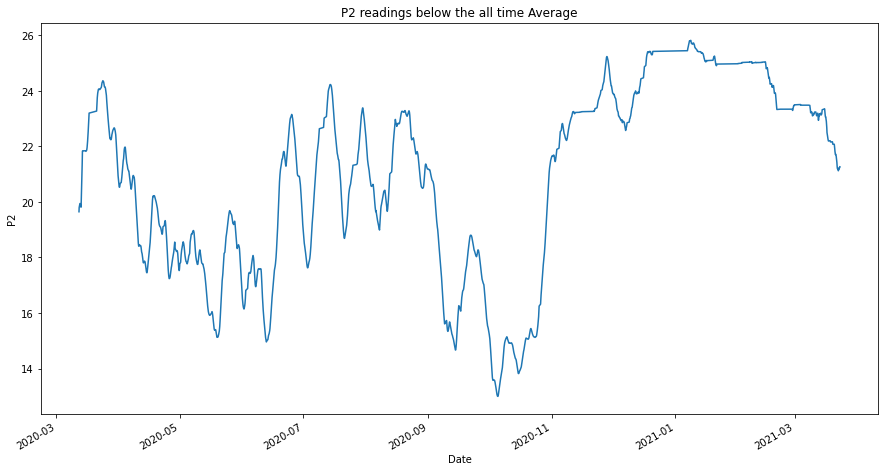

In [136]:
# query for time periods were P2 readings were off the mean
fig, ax = plt.subplots(figsize = (15,8))
df[df["P2"] < mean_p2]["P2"].rolling(168).mean().plot(ax =ax)
plt.title("P2 readings below the all time Average")
plt.ylabel("P2")
plt.xlabel("Date");

As said earlier on, the Covid pandemic led to the decrease in P2 readings from March 2020 to November 2020, and it can be seen that during the preiods from the latter periods of March 2020 to early periods of July 2020, the P2 readings were much lower than the subsequent periods. This is because these periods fall under the periods of an intensive lockdown periods were most of the industrial and commercial activities that contribute to the pollution of the air quality were reduced significantly and after these periods certain activities such as public transportation and delivery services became prominent.

##### On a timely Average, were there periods where P2 readings were relatively stable?

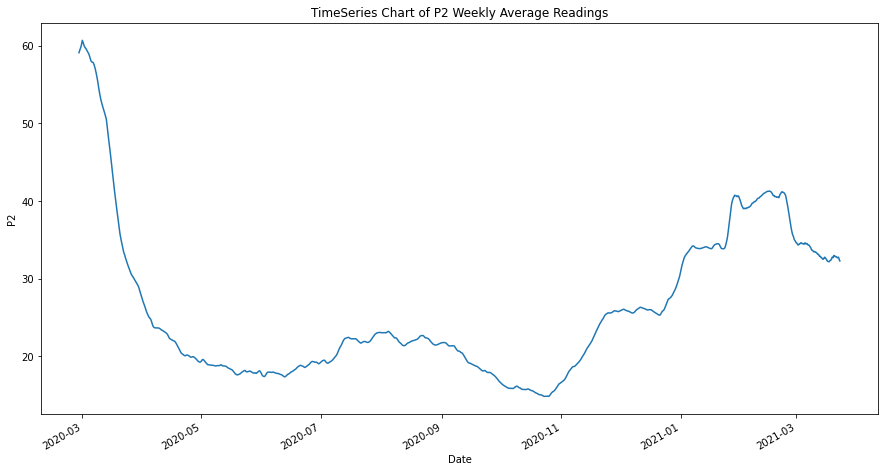

In [139]:
#plotting a timeseries graph of the P2 readings
fig, ax = plt.subplots(figsize = [15,8])
df["P2"].rolling(730).mean().plot(ax =ax)
ax.set_title("TimeSeries Chart of P2 Weekly Average Readings")
plt.ylabel("P2")
plt.xlabel("Date");

From the timeseries chart the, there was a less disturbance in the P2 readings in the periods between May 2020 to July 2020.

<Figure size 1080x576 with 0 Axes>

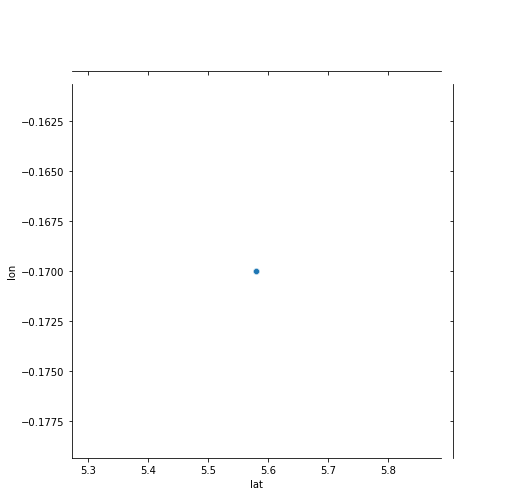

In [147]:
plt.figure(figsize = (15,8))
sb.jointplot(x="lat", y ="lon", data = df, height = 7)